In [1]:
# . fitness function ----

def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = 4.0
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        for xi in zip(abs(x)):
            output = net.activate(xi)
            genome.fitness -= (output[0] - xi[0]) ** 2
            # print('output:{} real:{}'.format(output[0],xi[0]))


# . neat run ----

def run(config_file, n = None):
    # load configuration
    config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                       neat.DefaultSpeciesSet, neat.DefaultStagnation,
                       config_file)
    # create the population, which is the top-level object for a NEAT run
    p = neat.Population(config)
    # add a stdout reporter to show progress in the terminal
    p.add_reporter(neat.StdOutReporter(True))
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    p.add_reporter(neat.Checkpointer(5))
    # run for up to n generations
    winner = p.run(eval_genomes, n)
    return(winner)


 ****** Running generation 0 ****** 

Population's average fitness: -1222.88507 stdev: 623.19884
Best fitness: -63.94908 - size: (1, 1) - species 1 - id 69
Average adjusted fitness: 0.481
Mean genetic distance 1.279, standard deviation 0.558
Population of 100 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   100    -63.9    0.481     0
Total extinctions: 0
Generation time: 2.621 sec

 ****** Running generation 1 ****** 

Population's average fitness: -1459.81007 stdev: 1003.45869
Best fitness: -55.42576 - size: (1, 1) - species 1 - id 178
Average adjusted fitness: 0.829
Mean genetic distance 1.462, standard deviation 0.572
Population of 100 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   100    -55.4    0.829     0
Total extinctions: 0
Generation time: 1.870 sec (2.246 average)

 ****** Running generation 2 ****** 

Population's average fitness:

Population's average fitness: -3198.20557 stdev: 10938.47039
Best fitness: 3.82381 - size: (1, 1) - species 1 - id 391
Average adjusted fitness: 0.965
Mean genetic distance 1.802, standard deviation 0.639
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   16    42      3.8    0.984    13
     2   11    26    -77.9    0.962     1
     3    7    32   -358.6    0.950     1
Total extinctions: 0
Generation time: 1.696 sec (1.884 average)

 ****** Running generation 17 ****** 

Population's average fitness: -1903.67010 stdev: 1771.54173
Best fitness: 3.82381 - size: (1, 1) - species 1 - id 1620
Average adjusted fitness: 0.872
Mean genetic distance 1.805, standard deviation 0.614
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   17    43      3.8    0.861    14
     2   12    28    -77.9    0.878     2
     3    8    29   -128.7  

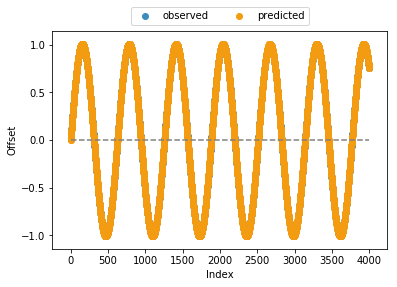

In [2]:
### ENVIRONMENT ====

### . packages ----

import os
import neat

import numpy as np
import matplotlib.pyplot as plt
import random


### . sample data ----

x = np.sin(np.arange(.01, 4000 * .01, .01))


### NEAT ALGORITHM ====

### . model evolution ----

random.seed(1899)
winner = run('config-feedforward', n = 25)


### . prediction ----

## extract winning model
config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation,
                     'config-feedforward')

winner_net = neat.nn.FeedForwardNetwork.create(winner, config)



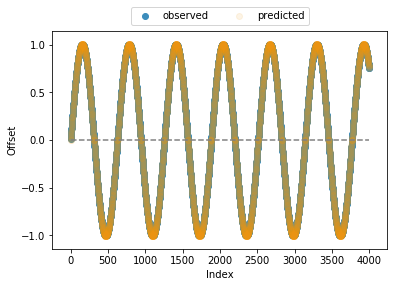

In [8]:
## make predictions
y = []
for xi in zip(abs(x)):
  y.append(winner_net.activate(xi))

## if required, adjust signs
for i in range(len(y)):
  if (x[i] < 0):
    y[i] = [x * -1 for x in y[i]]

## display sample vs. predicted data
plt.scatter(range(len(x)), x, color='#3c8dbc', label = 'observed') # blue
plt.scatter(range(len(x)), y, color='#f39c12', label = 'predicted', alpha = 0.1) # orange
plt.hlines(0, xmin = 0, xmax = len(x), colors = 'grey', linestyles = 'dashed')
plt.xlabel("Index")
plt.ylabel("Offset")
plt.legend(bbox_to_anchor = (0., 1.02, 1., .102), loc = 10, ncol = 2, mode = None, borderaxespad = 0.)
plt.show()
plt.clf()

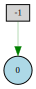

In [4]:
import visualize
visualize.draw_net(config, winner, True,fmt="png")

In [9]:
winner